# Argentina programa 4.0 - Módulo 2: Ciencia de Datos 

---




# Semana 1. Elementos de matemática y probabilidad


En este notebook vamos a repasar y trabajar en detalle vários de los conceptos y ejemplos que vimos en clase.



## Ajuste linear o regresión linear

Vamos a comenzar viendo el ejemplo del que hablamos en las diapositivas donde discutimos el concepto y la fórmula para la regresión lineal. 

Para esto creamos un conjunto de datos arbitrarios y lo graficamos.

In [45]:
# antes hacemos las importaciones de siempre para numpy y matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 


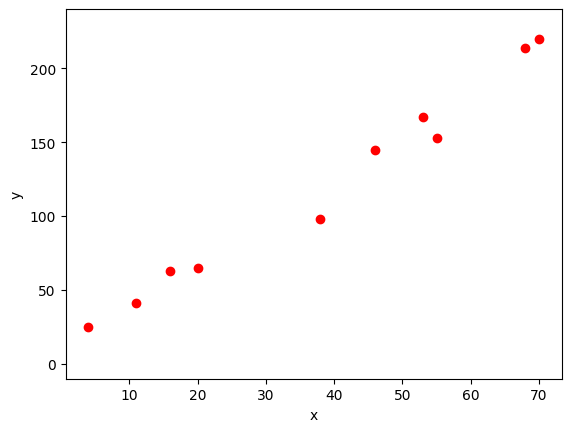

In [46]:
# generamos los pares de puntos que representan nuestros datos y los ploteamos
x = np.array([55.0, 38, 68, 70, 53, 46, 11, 16, 20, 4])
y = np.array([153.0, 98, 214, 220, 167, 145, 41, 63, 65, 25])
g = plt.scatter(x = x, y = y, color='red')  
plt.ylim((-10,240))
plt.xlabel('x'); plt.ylabel('y')
plt.show()

Para obtener la información de los valores de _a_ y _b_ que minimizan la recta usamos las fórmulas que mostramos en clase. Nos creamos una función que vamos a llamar *ajuste_lineal* 

In [47]:
def ajuste_lineal(x,y):
    a = sum(((x - x.mean())*(y-y.mean()))) / sum(((x-x.mean())**2))
    b = y.mean() - a*x.mean()
    return a, b

Ahora ajustamos usando la función ajuste_lineal para tener los valores de la pendiente (A) y la ordena al origen (B)

In [48]:
a, b = ajuste_lineal(x,y)
print('a =',a,'b =',b)

a = 2.905522724210283 b = 8.39958420758822


De esta forma somos capaces de graficar y de calcular la ecuación de la recta que surge de la regresión linear de los datos. 

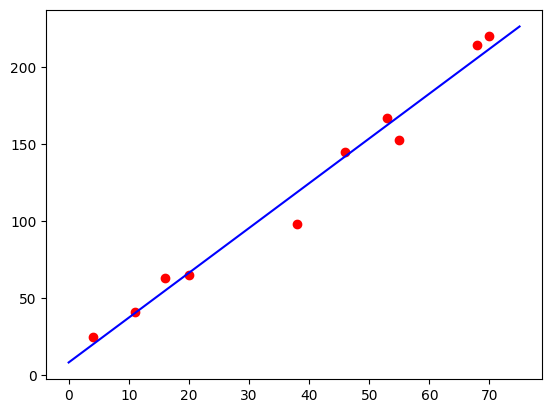

In [49]:
# generamos un rango de x para hacer un plot contínuo de la recta
xc = np.linspace(0,75,100)
# usamos la ecuación de la recta con los coeficintes fiteados usando la fórmula anterior
yc = a*xc+b
plt.plot(xc,yc, 'b')
plt.scatter(x = x, y = y, color='red')
plt.show()

## Generación aleatoria en Python

Veamos como generar números aleatorios para después realizar algunos experimentos. Por ejemplo, en `numpy` podemos generar un número entero aleatorio con `numpy.random.randint`. Pero también existe el módulo `random`:

In [50]:
import random

# Genera un número aleatorio entre 1 y 6
random.randint(1, 6)

2

Cada vez que se ejecute el comando arriba por primera vez puede salir un número distinto.
Sin embargo para cualquier generador aleatorio simpre podemos fijar la **semilla** (*seed*) que controla la generación. Esto nos permite recuperar siempre el mismo resultado, lo cual puede ser necesario para control y/o debuggeo del código. Fijando la semilla, se generarán siempre los mismos números aleatórios. En cada llamado el valor es distinto, claro, pero seguirán la mismma orden en cada vez que se reinicialize el código. Eso se puede ver ejecutando el "box" de arriba y el de abajo várias veces (en cada vez estamos importando el módulo nuevamente).

In [51]:
import random

# Fijo la semilla
random.seed(42)

# Genera un número aleatorio entre 1 y 6
random.randint(1, 6)

6

Ese ejemplo simula el tirar de un dado, en que podemos tener como resultado los números de 1 al 6 con igual probabilidad.

**¿Cuál es la probabilidad de sacar generala servida?**

La generala servida ocurre cuando tiramos 5 dados y todos salen con el mismo número. 

La probabilidad que los 5 números sean iguales es: 
⅙ * ⅙ * ⅙ * ⅙ * ⅙ = (⅙)^5

Pero como se puede hacer generala con cualquiera de los 6 números posibles, la probabilidad de generala servida es 6 * (⅙)^5 = (⅙)^4 ≈ 0.00077 = 0.077%

Podemos intentar realizar el cálculo de la probabilidad de generala servida haciendo un experimento numerico de tirar dados y mirando la frecuencia con la que la obtenemos:

In [52]:
import random

# Estimo la probabilidad de generala servida
N = 100000 # Número de experimentos
exitos = 0
for i in range(N):
  dados = [random.randint(1, 6) for k in range(5)]
  if dados.count(dados[0]) == 5:
    exitos += 1

print('La probabilidad de generala servida es', exitos/N)
print('En número exacto es', 1/6**4)

La probabilidad de generala servida es 0.00074
En número exacto es 0.0007716049382716049


En la medida en que aumentemos el número de experimentos N, el resultado se va a parecer cada vez más al calculado "teóricamente".

## Distribuciones 

En estadística, uno quiere saber como se *comportan* los datos. O dicho de otra manera, como se *distribuyen* los datos.

Por ejemplo si uno pudiera medir la altura de todas las personas de una población (ej hacer un censo de alturas), como es la distribución de esas alturas? Conocer esta distribución me puede servir para hacer predicciones, proyecciones, etc. 

La manera más directa de encontrar, o descubrir las distribuciones de los datos es la de censar, medir, muestrear, encuestar, o dicho en otras palabras, obtener *experimentalmente* los datos que uno busca. 

Alternativamente, si uno conoce la función matemática que describe una distribución uno puede *simular* datos en la computadora.

A continuación vamos a jugar con algunas distribuciones en Python, usando SciPy, o Numpy. 

**SciPy** es un módulo muy completo de cálculo, incluyendo una gran diversidad de conocimiento (distribuciones, métodos) estadísticos. 

A diferencia, **Numpy** es un paquete que nos ayuda a generar o trabajar con arrays numéricos, pero no tiene métodos estadísticos, salvo algunos para generar datos aleatorios. 



### El problema de las tiradas de monedas

Ahora pensemos en un problema de tirar monedas, en que la respuesta es binária, 0 o 1 (cara o seca). ¿Al tirar 10 veces una moneda con qué probabilidad sale un cierto número *n* de caras? Vamos a contar cuantas veces ocurre que al tirar 10 veces la moneda salgan *n* caras, para todos los valores de *n* posibles. ¿Qué esperamos? ¡Obtetener una distribución de valores! ¿Y que esta tenga moda en 5, no?

In [53]:
N = 100000      # número de experimentos
resultados = [] # lista en la que guardo resultados

for i in range(N):
  caras = 0
  for i in range(10):
    res = random.randint(0, 1)
    if res == 1: caras += 1
  
  # Equivalentemente
  # caras = sum([random.randint(0, 1) for i in range(10)])

  resultados.append(caras)

Graficamos los resultados con un histograma:

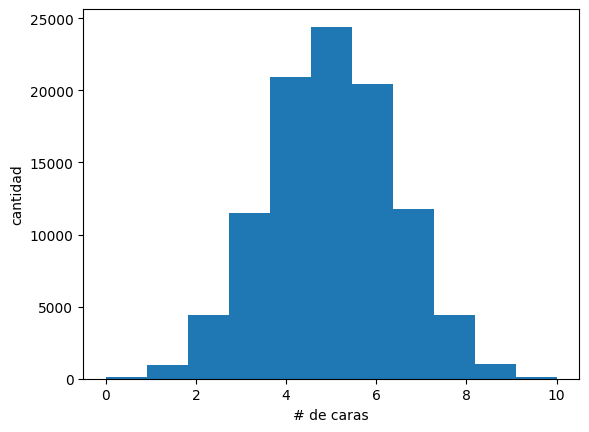

In [54]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(resultados, bins=11)
plt.xlabel('# de caras')
plt.ylabel('cantidad')
plt.show()

Ahora veamos, los distintos indicadores estadísticos. Los mismos los podemos hacer manualmente, pero también están ya implementados en varios paquetes, como `numpy` o `scipy`.

In [55]:
import numpy as np
from scipy import stats

print('Promedio:', np.mean(resultados))
print('Mediana:', np.median(resultados))
print('Moda:', stats.mode(resultados).mode)

Promedio: 5.00313
Mediana: 5.0
Moda: [5]


<ipython-input-55-110d2012ab22>:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('Moda:', stats.mode(resultados).mode)


Como la distribución es **simétrica**, el promedio y la mediana coinciden. Además, como es **unimodal** y simétrica, se cumple que promedio = mediana = media (una distribución es multimodal si tiene varios "picos").

También podemos calcular el desvío estándar, cuantiles, etc.

In [56]:
print('Varianza:', np.var(resultados))
print('Desvío estándar:', np.std(resultados))

print('Primer cuartil (Q1):', np.quantile(resultados, 0.25))
print('Segundo cuartil (Q2):', np.quantile(resultados, 0.5))
print('Tercer cuartil (Q3):', np.quantile(resultados, 0.75))
print('Cuantil 0.93:', np.quantile(resultados, 0.93))

Varianza: 2.4992402031000003
Desvío estándar: 1.5808985429495468
Primer cuartil (Q1): 4.0
Segundo cuartil (Q2): 5.0
Tercer cuartil (Q3): 6.0
Cuantil 0.93: 7.0


Y también podemos hacer el *box plot*

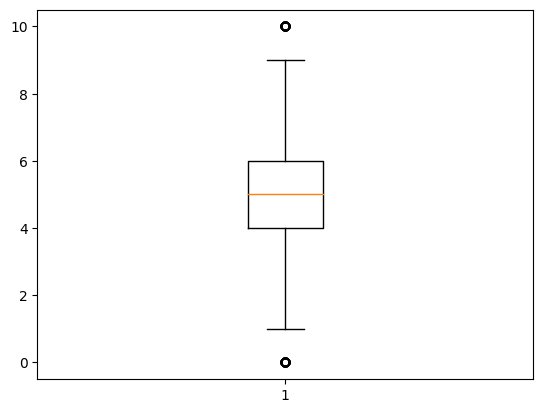

In [57]:
plt.figure()
plt.boxplot(resultados)
plt.show()

Vemos que nos toma los resultados de 0 y 10 como *outliers*. El largo de los "bigotes" (*whiskers*) por defecto sólo se extiende hasta 1.5 veces la distancia entre el primer y tercer cuartil (Q3-Q1) por fuera de la caja central. O sea:

*   Tope: Q3 + 1.5 * (Q3-Q1)
*   Base: Q1 - 1.5 * (Q3-Q1)

Lo podemos modificar ese valor, el 1.5,  con el parámetro `whis`. Poniéndolo en 2 ya debería abarcar todos los valores:

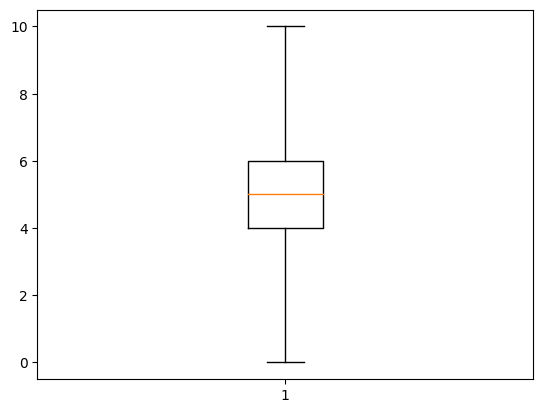

In [58]:
plt.figure()
plt.boxplot(resultados, whis=2)
plt.show()

### Un caso no simétrico

Estudiemos un caso más complejo, que no da resultados simétricos. Consideremos por ejemplo el producto de los resultados de dos dados de 6 caras. Los resultados pueden ir entre 1 (1x1) y 36 (6x6):

In [59]:
N_d = 100000      # número de experimentos
resultados_d = [] # lista en la que guardo resultados
random.seed(4)
#random.seed(100)

for i in range(N_d):
  caras = random.randint(1, 6) * random.randint(1, 6)
  
  resultados_d.append(caras)

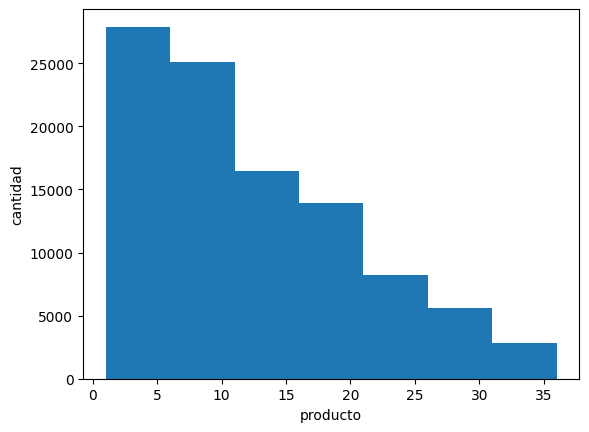

In [60]:
plt.figure()
plt.hist(resultados_d, bins=7)
plt.xlabel('producto')
plt.ylabel('cantidad')
plt.show()

Vemos en el histograma que los resultados no son simétricos, sino que decaen. Veamos que nos dicen los indicadores ahora:

In [61]:
print('Promedio:', np.mean(resultados_d))
print('Mediana:', np.median(resultados_d))
print('Moda:', stats.mode(resultados_d).mode)

Promedio: 12.22194
Mediana: 10.0
Moda: [6]


<ipython-input-61-32eca08e100a>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('Moda:', stats.mode(resultados_d).mode)


Los tres valores ya no coinciden. El box plots es

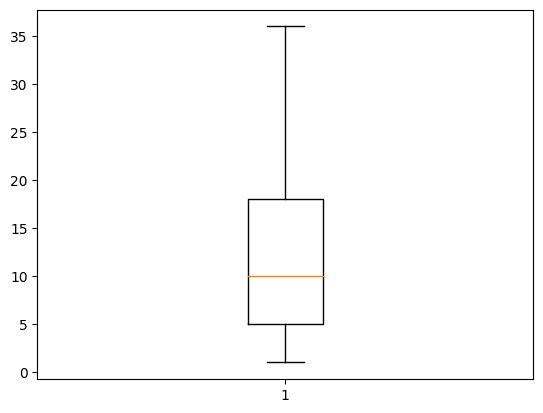

In [62]:
plt.figure()
plt.boxplot(resultados_d)
plt.show()

## Función distribución de probabilidad

En los ejemplos anteriores graficamos histogramas contando la cantidad de eventos para cada resultado. Pero se quisiésemos obtener la *función distribución de probabilidad* (PDF), tendríamos que dividir por el total de experimentos.

In [63]:
# Me armo una lista de la cantidad de eventos para cada resultado
n_caras = [i for i in range(11)]

cuentas_caras = []
for nc in n_caras:
  cuentas_caras.append(resultados.count(nc))

print(cuentas_caras)

[96, 956, 4396, 11496, 20932, 24409, 20420, 11766, 4426, 1016, 87]


In [64]:
# Ahora hago un array (para dividir) con las probabilidades de cada resultado
prob_caras = np.array(cuentas_caras)/sum(cuentas_caras)
prob_caras

array([0.00096, 0.00956, 0.04396, 0.11496, 0.20932, 0.24409, 0.2042 ,
       0.11766, 0.04426, 0.01016, 0.00087])

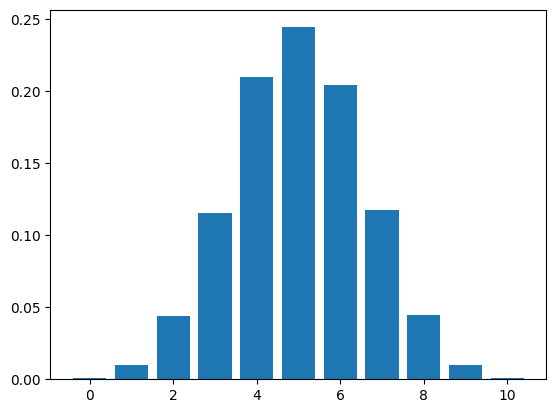

In [65]:
plt.figure()
plt.bar(n_caras, prob_caras)
plt.show()

La función `hist` de `matplolib` nos hace esto automáticamente usando la opción `density=True`. En este caso nos crea una **densidad de probabilidad**, en la que **no sólo se divide por la cantidad total de eventos, sino también por el ancho de cada bin** (en este caso era 1, por eso no nos preocupamos por eso). 

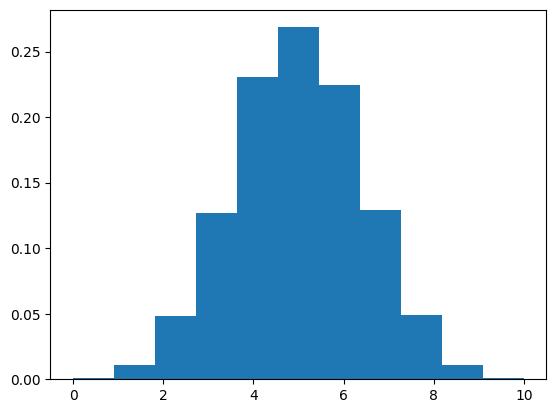

In [66]:
plt.figure()
plt.hist(resultados, bins=11, density=True)
plt.show()

Ahora podemos comparar este resultado con la fórmula binomial 

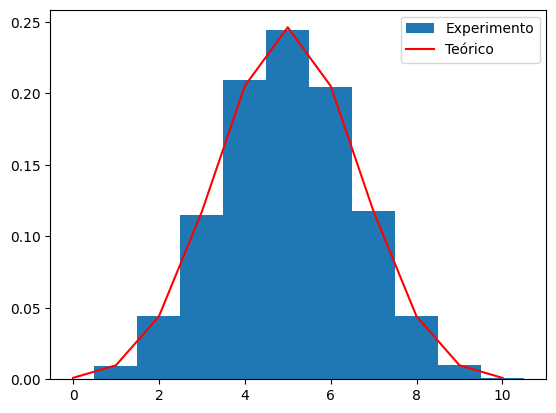

In [67]:
from math import factorial

def prob_n_caras(n):
  """"Probabilidad de obtener n caras en 10 tiros de moneda"""
  return (1/2)**10 * factorial(10)/(factorial(10-n)*factorial(n))

prob_caras_teorico = [prob_n_caras(nc) for nc in n_caras]

# Al histograma le voy a dar los comienzos de los bines para que quede centrado en el números
bordes_bin = np.linspace(0.5, 10.5, 11)

plt.figure()
plt.hist(resultados, bins=bordes_bin, density=True, label='Experimento')
plt.plot(n_caras, prob_caras_teorico, color='r', label='Teórico')
plt.legend()
plt.show()

¿Cómo se calcula el promedio (valor esperdado) de una distribución de probabilidad? Sumamos los resultados posibles pesados por su respectiva probabilidad:

In [68]:
valor_esperado = 0
for i, prob in enumerate(prob_caras_teorico):
  # voy sumando nºcaras * probabilidad
  valor_esperado += n_caras[i] * prob

valor_esperado

5.0

### Distribución de probabilidad discreta: otro ejemplo con distribución binomial

Para acceder a un Master de postgrado se realiza un examen tipo test a los solicitantes. El examen consta de cinco preguntas y cada una tiene cuatro posibles resultados. Un alumno no conoce las respuestas, pero decide contestar en función del siguiente juego: tira un dado, si sale un 1 elige el primer resultado; si sale un 2, elige el segundo resultado, y así sucesivamente; si sale un 5 ó un 6, tira el dado de nuevo. Determinar:
1. ¿Cuál es la probabilidad de éxito y cuál la de fracaso?
2. ¿Cuál es la probabilidad de que acierte una respuesta?
3. ¿Cuál es la probabilidad de acertar dos o tres respuestas?

Vamos a escribir un programa para responder a estas preguntas


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [70]:
def tiradas(N=5):         # N = número de preguntas
  respuestas = []
  #random.seed(10)
  tiro = 0
  while tiro < N:
    dado = random.randint(1, 6)
    #print(dado)
    if (dado < 5):
        respuestas.append(dado)
        tiro += 1      
  return respuestas
  
print(tiradas())

[4, 3, 3, 2, 3]


In [71]:
# ¿Cuál es la probabilidad de éxito y cuál la de fracaso?
preguntas = tiradas(500000)
p = preguntas.count(1)/len(preguntas)

print("Probabilidad exito p= ",p)
print("Probabilidad fracaso q= ",1-p)

Probabilidad exito p=  0.250228
Probabilidad fracaso q=  0.749772


In [72]:
# ¿Cuál es la probabilidad de que acierte una respuesta?
M = 100000               # número de experimentos
correctas = []
for i in range(M):
  respuestas = tiradas()
  ok = respuestas.count(1)
  correctas.append(ok)

print("Probabilidad que acierte una respuestas es: ",correctas.count(1)/M)

Probabilidad que acierte una respuestas es:  0.39552


In [73]:
#¿Cuál es la probabilidad de acertar dos o tres respuestas?
print("Probabilidad de acertar 2 o 3 respuestas es:",(correctas.count(2)+correctas.count(3))/M)

Probabilidad de acertar 2 o 3 respuestas es: 0.35289


Podemos hacer un gráfico de la distribución binomial usando Scipy

[7.88860905e-31 7.88860905e-29 3.90486148e-27 1.27558808e-25
 3.09330110e-24 5.93913812e-23 9.40363535e-22 1.26277389e-20
 1.46797465e-19 1.50059631e-18 1.36554264e-17 1.11726216e-16
 8.28636101e-16 5.60922899e-15 3.48573516e-14 1.99848816e-13
 1.06169683e-12 5.24603142e-12 2.41900338e-11 1.04399093e-10
 4.22816327e-10 1.61072886e-09 5.78398092e-09 1.96152396e-08
 6.29322272e-08 1.91313971e-07 5.51867223e-07 1.51252498e-06
 3.94336870e-06 9.79043264e-06 2.31706906e-05 5.23209142e-05
 1.12816971e-04 2.32471335e-04 4.58105277e-04 8.63855666e-04
 1.55973940e-03 2.69792760e-03 4.47287998e-03 7.11073227e-03
 1.08438667e-02 1.58690732e-02 2.22922695e-02 3.00686426e-02
 3.89525598e-02 4.84742966e-02 5.79583981e-02 6.65905000e-02
 7.35270104e-02 7.80286641e-02 7.95892374e-02 7.80286641e-02
 7.35270104e-02 6.65905000e-02 5.79583981e-02 4.84742966e-02
 3.89525598e-02 3.00686426e-02 2.22922695e-02 1.58690732e-02
 1.08438667e-02 7.11073227e-03 4.47287998e-03 2.69792760e-03
 1.55973940e-03 8.638556

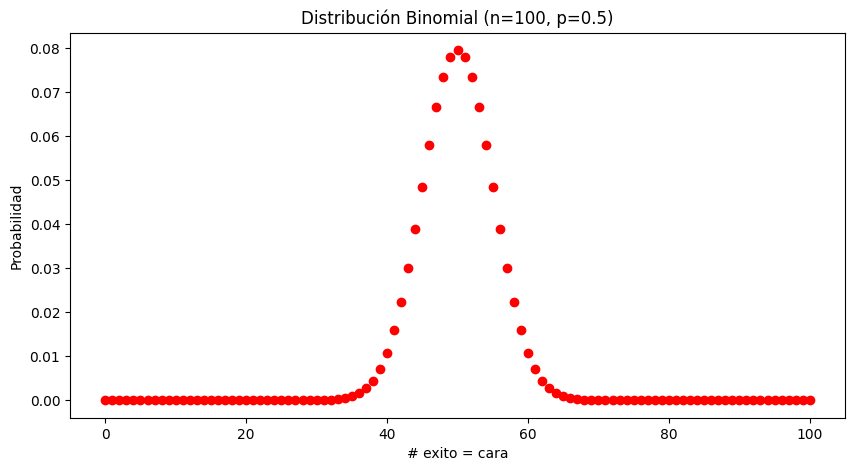

In [74]:
from scipy.stats import binom

n = 100
p = 0.5
x = np.arange(0, n+1)
binomial_pmf = binom.pmf(x, n, p)

print(binomial_pmf)
plt.figure(figsize = (10, 5))
plt.plot(x, binomial_pmf, 'ro')
plt.title(f"Distribución Binomial (n={n}, p={p})")
plt.xlabel('# exito = cara')
plt.ylabel('Probabilidad')
plt.show()

## Variable Continua: Distribución gaussiana 




Mas información en: [scipy.stats.norm](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.norm.html)

Para estudiar una distribución gaussiana vamos graficar una distribución normal con valor medio 15 y varianza 4 (o sea desvio estándar 2).

In [75]:
from scipy.stats import norm
mu=15.0
sigma=2.0
mi_gaussiana=norm(loc=mu,scale=sigma)

Para poder graficar la función de densidad de probabilidad de la gaussiana vamos a hacer;

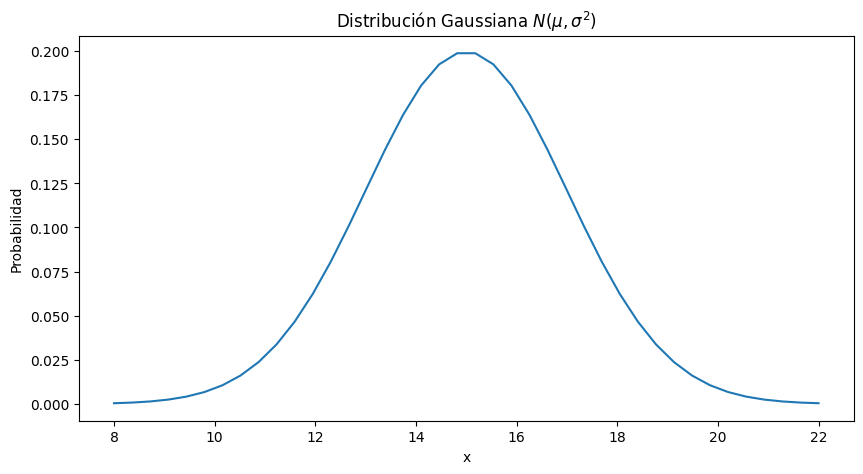

In [76]:
# valores posibles
x = np.linspace(8.0,22.0,40)

plt.figure(figsize = (10, 5))
plt.plot(x,mi_gaussiana.pdf(x))
plt.title(f"Distribución Gaussiana $N(\mu,\sigma^2)$")
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.show()

y podemos marcar la posición del valor medio, el valor medio ± 1 desvio estándar y el valor medio ± 2 desvios estándares.

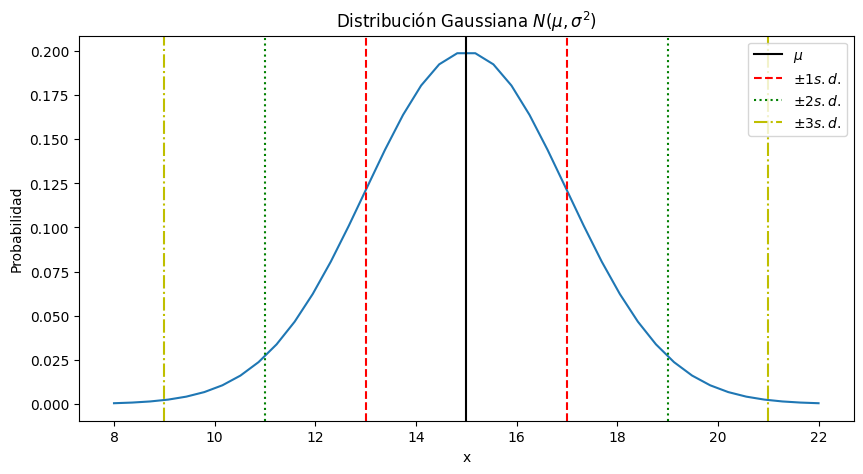

In [77]:
plt.figure(figsize = (10, 5))
plt.plot(x,mi_gaussiana.pdf(x))
plt.axvline(mu,color='black',linestyle='solid',label='$\mu$')
plt.axvline(mu-sigma,color='r',linestyle='dashed',label='$\pm 1 s.d.$')
plt.axvline(mu+sigma,color='r',linestyle='dashed')
plt.axvline(mu-2.0*sigma,color='g',linestyle='dotted',label='$\pm 2 s.d.$')
plt.axvline(mu+2.0*sigma,color='g',linestyle='dotted')
plt.axvline(mu-3.0*sigma,color='y',linestyle='-.',label='$\pm 3 s.d.$')
plt.axvline(mu+3.0*sigma,color='y',linestyle='-.')

plt.xlabel('x')
plt.title(f"Distribución Gaussiana $N(\mu,\sigma^2)$")
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.legend(loc='upper right')
plt.show()

Ahora vamos a generar datos que sigan esta distribución. Para esto vamos a usar el método *rvs* 

In [78]:
Nexp=1000
mediciones=mi_gaussiana.rvs(Nexp)
#print(mediciones)

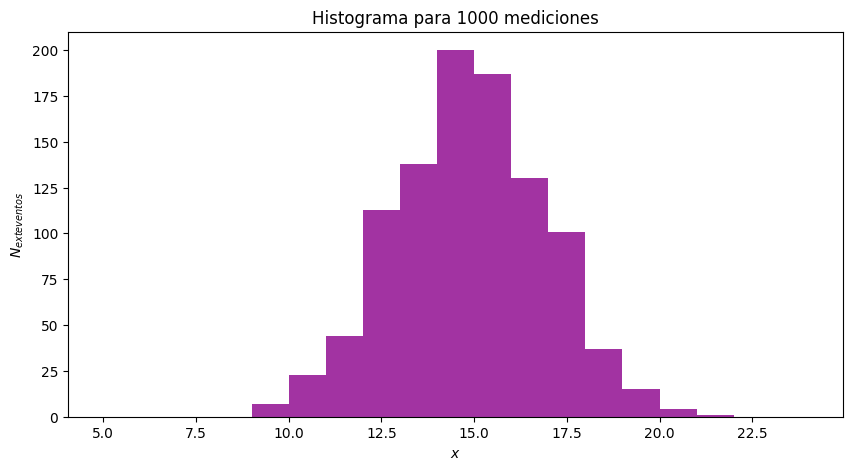

In [79]:
bins=np.arange(5,25,1.0)

plt.figure(figsize = (10, 5))
plt.hist(mediciones,bins=bins,color='darkmagenta',alpha=0.8)
plt.xlabel('$x$')
plt.ylabel('$N_{\text{eventos}}$')
plt.title('Histograma para '+str(Nexp)+' mediciones')
plt.show()

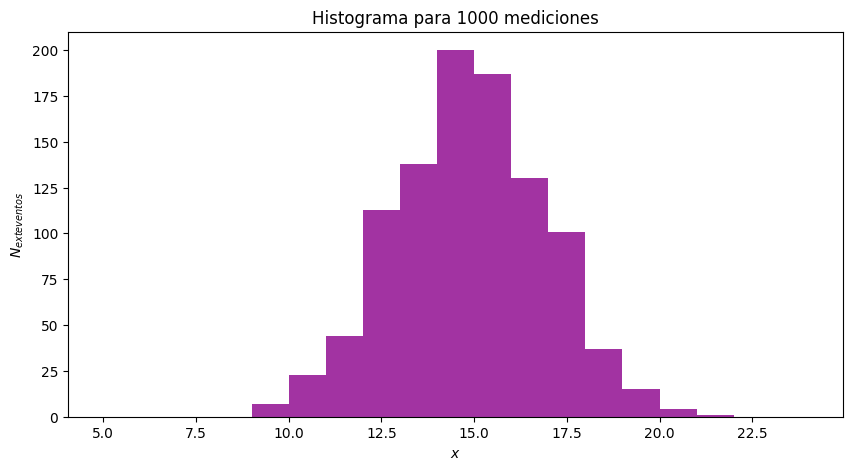

[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22.
 23. 24.]
[  0.   0.   0.   0.   7.  23.  44. 113. 138. 200. 187. 130. 101.  37.
  15.   4.   1.   0.   0.]

Número total de eventos:  1000.0


In [80]:
# desempaquetando el histrograma
bins=np.arange(5,25,1.0)

plt.figure(figsize = (10, 5))
binned_data, hist_bins, pp = plt.hist(mediciones,bins=bins,color='darkmagenta',alpha=0.8) #,density='True')
plt.xlabel('$x$')
plt.ylabel('$N_{\text{eventos}}$')
plt.title('Histograma para '+str(Nexp)+' mediciones')
plt.show()

# imprimimos las lista de bines y la lista de número de eventos en cada bin
print(hist_bins)
print(binned_data)
# podemos calcular la integral debajo de la curva
print()
print('Número total de eventos: ',np.sum(binned_data))

Veamos ahora como la distribución depende del número de mediciones

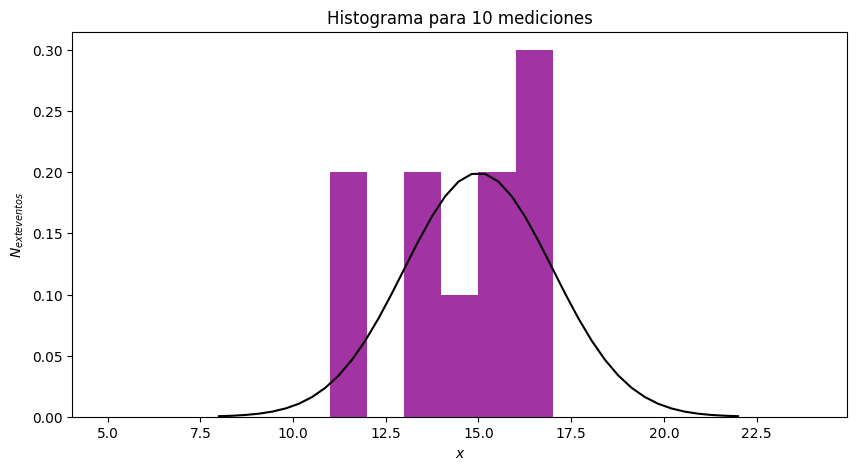

In [81]:
Nexp=10
mediciones=mi_gaussiana.rvs(Nexp)
bins=np.arange(5,25,1.)

plt.figure(figsize = (10, 5))
plt.hist(mediciones,bins=bins,color='darkmagenta',alpha=0.8,density='True')
plt.plot(x,mi_gaussiana.pdf(x),color='black')
plt.xlabel('$x$')
plt.ylabel('$N_{\text{eventos}}$')
plt.title('Histograma para '+str(Nexp)+' mediciones')
plt.show()


#### Probabilidades 

Volviendo a la **función de distribución de probabilidad gaussiana**, vamos a calcular el porcentaje de eventos que tenemos a ± 1 desvio estándar. Para esto hay que acordarse de que la probabilidad de que _x_ esté entre dos valores es el **área bajo la curva de la PFF entre esos dos valores**. Matematicamente se suele representar el áre apor un símbolo semejante a una "S" distorcionada (y al cálculo del área se le llama "integral"). En python el área se pude calcular con la función "quad". En resumen, la probabilidad de tener la variable _x_ entre ± 1 desvio estándar, o sea, entre $\mu-\sigma$ y $\mu+\sigma$ se escribe como 

$
P(\mu ± 1\sigma) = \int_{\mu-\sigma}^{\mu+\sigma}{f(x) dx}
$

y se calcula así:


In [82]:
from scipy.integrate import quad
x_lower = mu-sigma # limite inferior
x_upper = mu+sigma # limite superior 

val, abserr = quad(mi_gaussiana.pdf, x_lower, x_upper)
val

0.682689492137086

Eso mustra que la región de $x$ entre $\mu-\sigma$ y $\mu+\sigma$ contiene 68% de la probabilidad.


También podemos calcular la probabilidd de tener valores menores a 13, por ejemplo

$
P(x < 13) = \int_{-\infty}^{13}{f(x) dx}
$

In [83]:
x_lower = -np.inf # limite inferior
x_upper = 13 # limite superior 

val, abserr = quad(mi_gaussiana.pdf, x_lower, x_upper)
print(val)

# Tambien podemos usar sf de Scipy
print(mi_gaussiana.cdf(13))              # Cumulative density function

0.15865525393145705
0.15865525393145707


Y la probabilidad de tener valores mayores a 18

$
P(x > 18) = \int_{18}^{\infty}{f(x) dx}
$

In [84]:
x_lower = 18 # limite inferior
x_upper = np.inf # limite superior 

val, abserr = quad(mi_gaussiana.pdf, x_lower, x_upper)
print(val)

# Tambien podemos usar sf de Scipy
print(mi_gaussiana.sf(18))              # Survival function  1-cdf

0.06680720126885487
0.06680720126885807


#### **Percentiles**:
El percentil es una medida de posición usada en estadística que indica, una vez ordenados los datos de menor a mayor, el valor de la variable por debajo del cual se encuentra un porcentaje dado de observaciones en un grupo. Por ejemplo, el percentil 20 es el valor bajo el cual se encuentran el 20% de las observaciones, y el 80% restante son mayores.

Queremos calcular el percentil 98, o sea a partir de que valor de *x* tenemos el 98% de los datos

In [85]:
value = mi_gaussiana.ppf(0.98)       
#value = norm.ppf(0.98, loc = 15, scale = 2)    # ppf = Percent point function 
value

19.107497821263646

In [86]:
# la inversa seria
print(norm.isf(0.02, loc=15, scale=2))          # Inverse survival function 

19.107497821263646


¡Ahora ya están preparado/as para hacer los ejercícios de probabilidad!

## Apéndice: Visualizando conceptos

Muchas veces una visualización ayuda a comprender mejor los conceptos. Asi que vamos a dejarles documentado algunos trucos de *matplotlib* para pintar areas debajo de una curva. Eso nos va a permitir *ver* percentilos, y otros conceptos. 

 El truco es usar la funcion ``fill_between`` de matplotlib, que *pinta* el área delimitada por un rango de valores de ```x``` (y los valores de ```y``` que salgan de la función). 

En resumen:
```
fill_between(rango_x, funcion)
```

Vamos a usar la distribución normal, pero pueden adaptar el código para otras distribuciones.

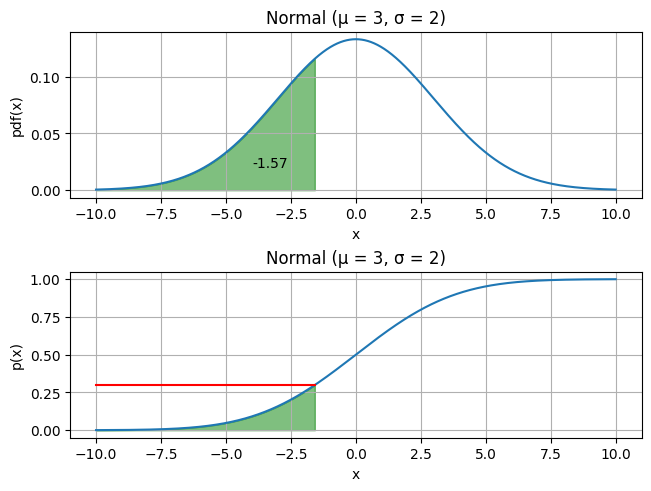

In [87]:
import matplotlib.pyplot as plt
from scipy.stats import norm

media = 0
sigma = 3

# creamos el objeto que contiene la distribución
normal = norm(loc=media, scale=sigma)

# inicializamos dos plots
fig, ax = plt.subplots(2, constrained_layout = True)
# para el primer plot usamos ax[0]
# para el segundo, ax[1]

# y vamos ploteando por partes
# 1 - la distribución 
x= np.arange(-10,10,0.001)
ax[0].plot(x, normal.pdf(x))
ax[0].set_title("Normal (µ = 3, σ = 2)")
ax[0].set_xlabel('x')
ax[0].set_ylabel('pdf(x)')

# le ponemos una grilla
ax[0].grid(True)

# supongamos que queremos saber el valor de x tal que
# la probabilidad = 0.3, o sea el percentilo 30
x3 = normal.ppf(0.3)

# ahora pintamos la parte de la curva 
# generamos un rango x para pintar
rx = np.arange(-10, x3, 0.01) # el primer valor puede ser -infinito

# pintamos usando 'fill_between'
# pinta el rango x (rx en nuestro caso)
# debajo de la curva que le pasemos (normal.pdf(x) en nuestro caso)
# alpha = transparencia y color = ... bueno 
ax[0].fill_between(rx, normal.pdf(rx), alpha=0.5, color='g')

# podemos agregar texto tambien!
coordx = -4.0
coordy = 0.02
texto = round(x3,2)
ax[0].text(coordx,coordy,texto, fontsize=10)

# ahora ploteamos la funcion cumulativa
# esto lo hacemos en otro subplot (el ax[1])
ax[1].plot(x, normal.cdf(x))
ax[1].set_title("Normal (µ = 3, σ = 2)")
ax[1].set_xlabel('x')
ax[1].set_ylabel('p(x)')
ax[1].grid(True)


# y le pintamos la parte corespondiente de la curva
ax[1].fill_between(rx,normal.cdf(rx), alpha=0.5, color='g')

# y trazamos una linea 
# para ver mejor, je
xl, yl = [-10, x3], [0.3, 0.3] # entre dos puntos se genera una recta, 
ax[1].plot(xl, yl, color="red")